# Librerias

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from models.kmeans import KMeansClustering as KMeansOriginal
from models.kmeans_optimization import KMeansClustering as KMeansOptimized

Index(['Max Iterations', 'ARS-PCA-R21D'], dtype='object')
Index(['Max Iterations', 'ARS-PCA-S3D'], dtype='object')
Index(['Max Iterations', 'ARS-RP-R21D'], dtype='object')
Index(['Max Iterations', 'ARS-RP-S3D'], dtype='object')


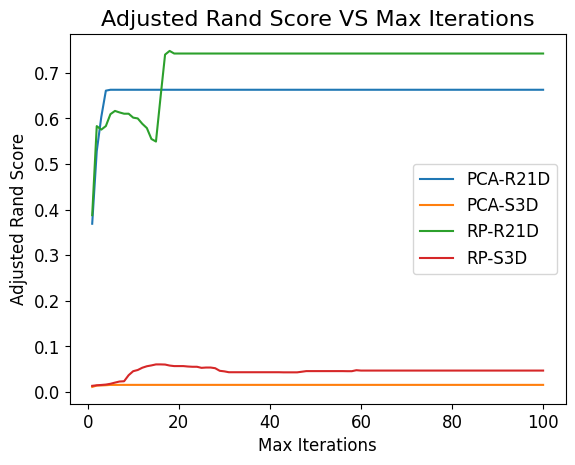

In [9]:

# Rutas a los archivos CSV
files = {
    'PCA-R21D': './experiments-results/ARS-PCA-R21D.csv',
    'PCA-S3D': './experiments-results/ARS-PCA-S3D.csv',
    'RP-R21D': './experiments-results/ARS-RP-R21D.csv',
    'RP-S3D': './experiments-results/ARS-RP-S3D.csv'
}

fig, ax = plt.subplots()

for label, filepath in files.items():
    df = pd.read_csv(filepath)
    print(df.columns)
    original_col_name = df.columns[1] 
    new_col_name = original_col_name.replace('ARS-', '')  
    df.rename(columns={original_col_name: new_col_name}, inplace=True)
    ax.plot(df['Max Iterations'], df[new_col_name], label=new_col_name) 

ax.legend(fontsize=12) 

ax.set_title('Adjusted Rand Score VS Max Iterations', fontsize=16)  
ax.set_xlabel('Max Iterations', fontsize=12)  
ax.set_ylabel('Adjusted Rand Score', fontsize=12) 
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

In [4]:
def test_kmeans_performance(n_points=8000, n_features=1000, k=10, max_iterations=200):
    X = np.random.rand(n_points, n_features)

    kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
    kmeans_optimized = KMeansOptimized(n_clusters=k, random_state=42)

    # Medir tiempo de ejecución del KMeans original
    start_time = time.time()
    kmeans_original.fit(X, max_iterations)
    original_duration = time.time() - start_time

    # Medir tiempo de ejecución del KMeans optimizado
    start_time = time.time()
    kmeans_optimized.fit(X)
    optimized_duration = time.time() - start_time

    return original_duration, optimized_duration

# Puntos a testear
n_points_list = list(range(1000, 11000, 1000))

# Listas para guardar los resultados
original_times = []
optimized_times = []

# Testear el rendimiento con diferentes números de puntos
for n_points in n_points_list:
    original_duration, optimized_duration = test_kmeans_performance(n_points=n_points)
    original_times.append(original_duration)
    optimized_times.append(optimized_duration)



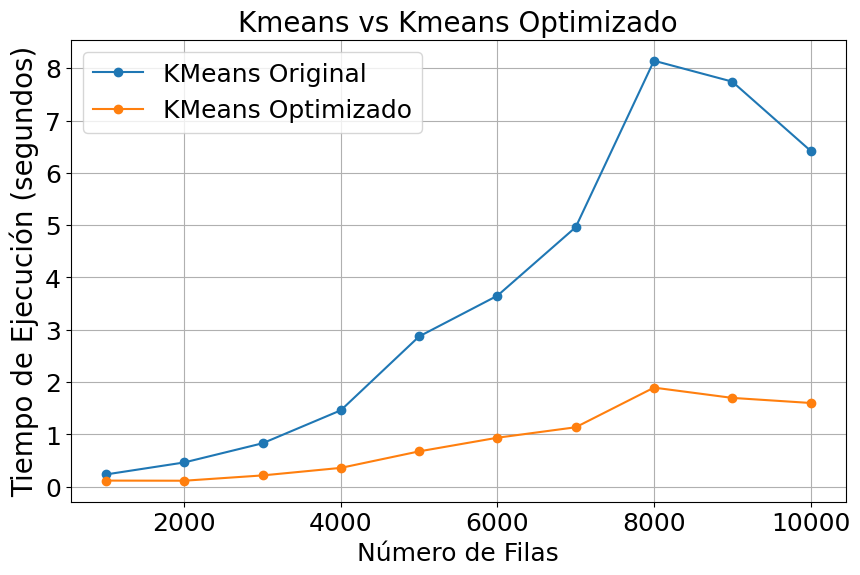

In [7]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_points_list, original_times, label='KMeans Original', marker='o')
plt.plot(n_points_list, optimized_times, label='KMeans Optimizado', marker='o')
plt.xlabel('Número de Filas', fontsize=18)  
plt.ylabel('Tiempo de Ejecución (segundos)', fontsize=20)
plt.title('Kmeans vs Kmeans Optimizado', fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=18)  
plt.show()
